# Changing Turbine Governor Setpoints

This notebook shows an example of changing the generator setpoints in a time-domain simulation. Data in this example is trivial, but the example can be retrofitted for scenarios such as economic dispatch incorporation or reinforcement learning.

Steps are the folllwing:

1. Initialize a system by running the power flow,
2. Set the first simulation stop time in `TDS.config.tf`,
3. Run the simulation,
3. Update the setpoints,
4. Set the new simulation stop time and repeat from 3 until the end.

## Step 1: Case Setup

In [1]:
import andes
from andes.utils import get_case

In [2]:
kundur = get_case('kundur/kundur_full.xlsx')

ss = andes.run(kundur)

Working directory: "/Users/hcui7/repos/andes/examples"
Loaded config from file "/Users/hcui7/.andes/andes.rc"
Parsing input file "/Users/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0589 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0137 seconds.
Report saved to "kundur_full_out.txt" in 0.0012 seconds.
-> Single process finished in 0.1234 seconds.


In [3]:
# disable the Toggler in this case
ss.Toggler.alter('u', 1, 0)

## Step 2: Set the First Stop Time

In [4]:
# simulate to t=1 sec

# specify the first stop in `ss.TDS.config.tf`
ss.TDS.config.tf = 1

## Step 3: Run Simulation

In [5]:
ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-1sec.
Fixed step size: h=33.33msec., shrink if not converged
Initialization was successful in 0.0120 seconds.


 98%|██████████████████████████████▍| 98/100 [00:00<00:00, 1329.99%/s]

Simulation completed in 0.0741 seconds.
TDS outputs saved in 0.0019 seconds.


True

## Step 4. Apply the auxiliary power setpoints to `TGOV1.paux0.v`

First, let's check the equations of TGOV1. `ss.TGOV1.paux0` is associated with equation `0 = paux - paux0`, in which `paux` is added to the power input equation.

In [6]:
print(ss.TGOV1.doc())

Model <TGOV1> in Group <TurbineGov>

    TGOV1 model.
    
Parameters

 Name  |          Description          | Default | Unit |   Type    | Properties
-------+-------------------------------+---------+------+-----------+-----------
 idx   | unique device idx             |         |      | DataParam |           
 u     | connection status             | 1       | bool | NumParam  |           
 name  | device name                   |         |      | DataParam |           
 syn   | Synchronous generator idx     |         |      | IdxParam  | mandatory 
 R     | Speed regulation gain under   | 0.050   | p.u. | NumParam  | ipower    
       | machine base                  |         |      |           |           
 wref0 | Base speed reference          | 1       | p.u. | NumParam  |           
 VMAX  | Maximum valve position        | 1.200   | p.u. | NumParam  | power     
 VMIN  | Minimum valve position        | 0       | p.u. | NumParam  | power     
 T1    | Valve time constant          

In [7]:
# look up the original values of TGOV1 make sure they are as expected

ss.TGOV1.paux0.v

array([0., 0., 0., 0.])

In [8]:
# MUST use in-place assignments. 
# Here, we increase the setpoint of the 0-th generator

ss.TGOV1.paux0.v[0] = 0.05

In [9]:
ss.TDS.config.tf = 10

In [10]:
ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 1.0-10sec.
Fixed step size: h=33.33msec., shrink if not converged


100%|██████████████████████████████| 100.0/100 [00:02<00:00, 39.71%/s]

Simulation completed in 2.5186 seconds.
TDS outputs saved in 0.0055 seconds.


True

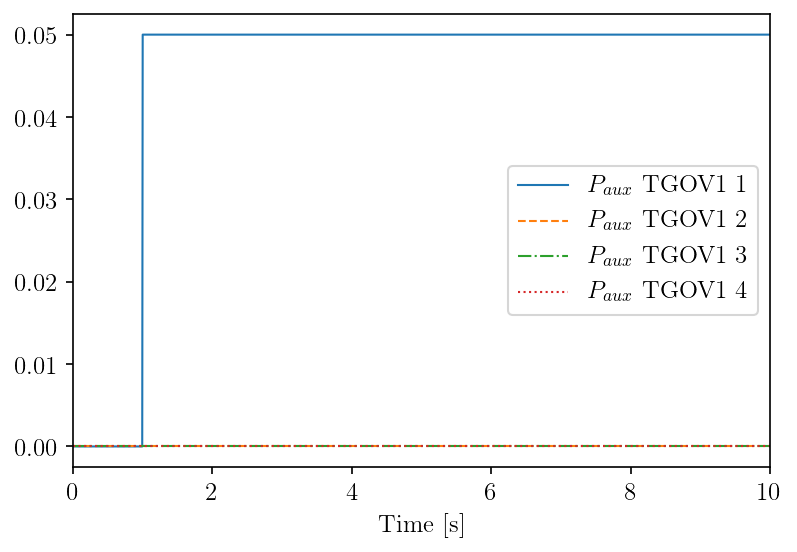

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x123c07a90>)

In [11]:
ss.TDS.plotter.plot(ss.TGOV1.paux)

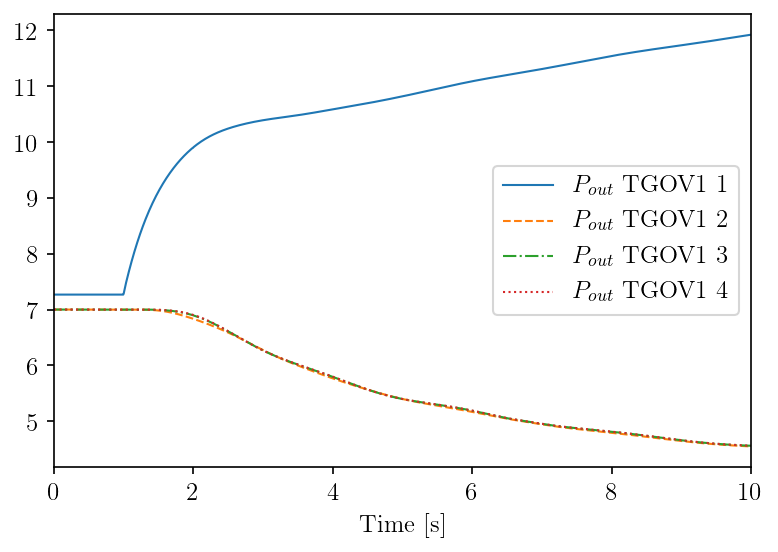

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1262b6160>)

In [12]:
ss.TDS.plotter.plot(ss.TGOV1.pout)

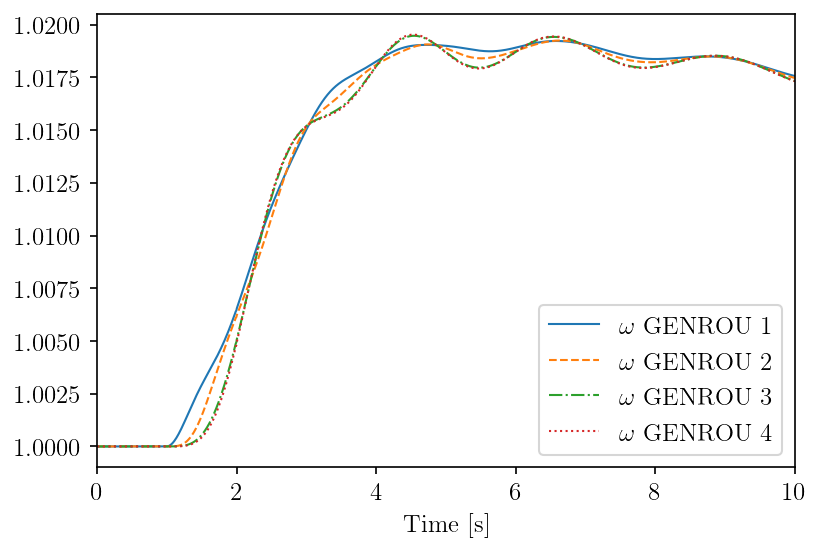

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1262b1828>)

In [13]:
ss.TDS.plotter.plot(ss.GENROU.omega)

## Step 5: Set New Setpoints and New Ending TIme.

In this example, we remove the auxiliary power setpoints to `TGOV1.paux0.v`

In [14]:
# use in-place assignment again

ss.TGOV1.paux0.v[0] = 0.

# set the new ending time to 20 sec.
ss.TDS.config.tf = 20

In [15]:
ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 10.0-20sec.
Fixed step size: h=33.33msec., shrink if not converged


100%|██████████████████████████████| 100.0/100 [00:03<00:00, 32.78%/s]

Simulation completed in 3.0510 seconds.
TDS outputs saved in 0.0108 seconds.


True

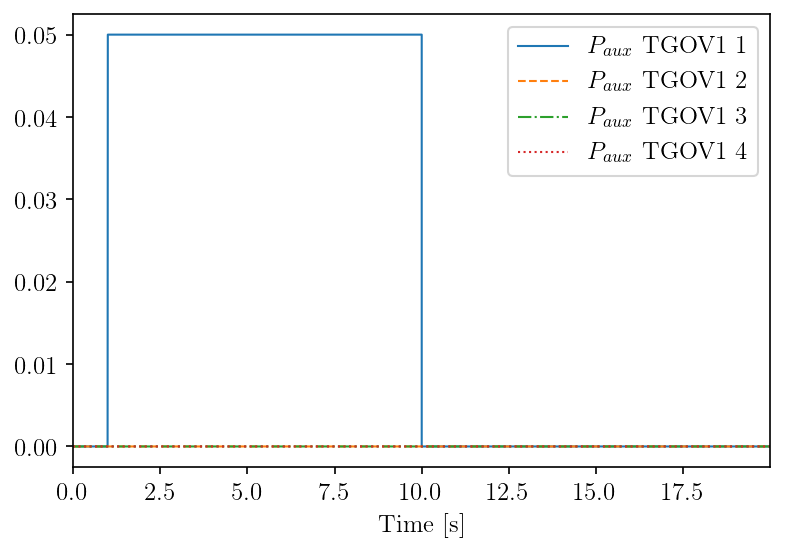

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x126840b38>)

In [16]:
ss.TDS.plotter.plot(ss.TGOV1.paux)

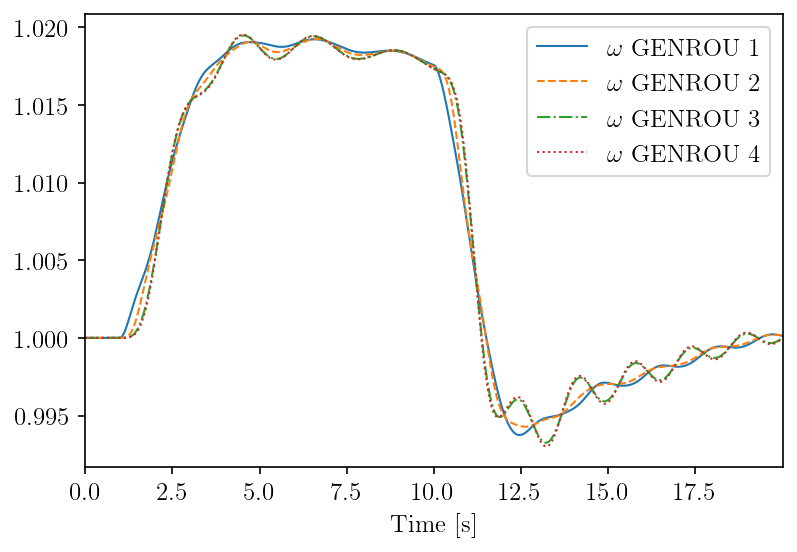

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12714ada0>)

In [17]:
ss.TDS.plotter.plot(ss.GENROU.omega)